# Amazon Fine Food Reviews with Linear SVM

### In SVM, We have hyperplanes that are seperated from +π and -π parallel to plane π.Points on +π and -π are support vectors.We would be finding the hyperparameter C with the help of SGD which will give us alpha.
### If C increases, tendency to make mistakes on Dtrain decreases.Model becomes Overfit with High Variance.
### If C decreases,Underfit with High Bias.

In [28]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import string
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
conn = sqlite3.connect('final.sqlite')#Loading the Data set
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, conn)

In [30]:
final = final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')#Sorting the data according to the Time in ascending order

In [31]:
x = final['CleanedText'].values[0:100000]#Taking 100K Values 
y = final['Score'].values[0:100000]

In [32]:
from sklearn.model_selection import train_test_split#Splitting the dataset with 70K train dataset and 30K test dataset
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)#Splitting the data into Test and Train

In [33]:
#Plot Confusion Matrix for the dataset
from sklearn.metrics import confusion_matrix
import itertools   
def plot_confusion_matrix(cm, classes,
      
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
     #else:
      #  print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [72]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

# Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #Vectorization for BOW
X_train = count_vect.fit_transform(x_train)# Fitting and training our dataset on train dataset
X_test = count_vect.transform(x_test)
print("Train Data Size: ",X_train.shape)
print("Test Data Size: ",X_test.shape)


Train Data Size:  (70000, 31419)
Test Data Size:  (30000, 31419)


In [10]:
from sklearn import preprocessing
#Column Standardization of the values with Mean deviation
scaler = preprocessing.StandardScaler(copy=True, with_mean=False, with_std=True)
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.fit_transform(X_test)

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=10)

tuned_parameters = {'alpha': [1e-6, 1e-5, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]}
                    
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)# using gridsearch on SGD with Hinge loss gives us value of alpha.
model = GridSearchCV(clf, tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)#Gridsearch on SGD Model.
model.fit(X1_train, y_train)#fitting the train dataset



Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.7s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-06, 1e-05, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf = SVC(C=0.0001, kernel='linear',probability=True)#Applying Linear SVC with Values implemented on C from Alpha
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
print("Accuracy	on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))# accuracy of model on Unseen/Test dataset



Accuracy	on test set: 90.977%


In [38]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8994193155790051, 0.9097666666666666, 0.8968880172325682, None)

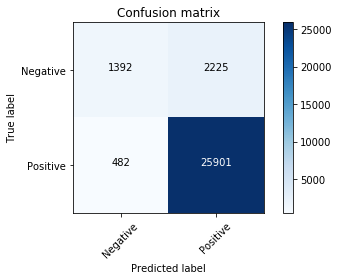

In [39]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Negative","Positive"])#Passing Parameters in fn to predict values.

# Printing Top Features

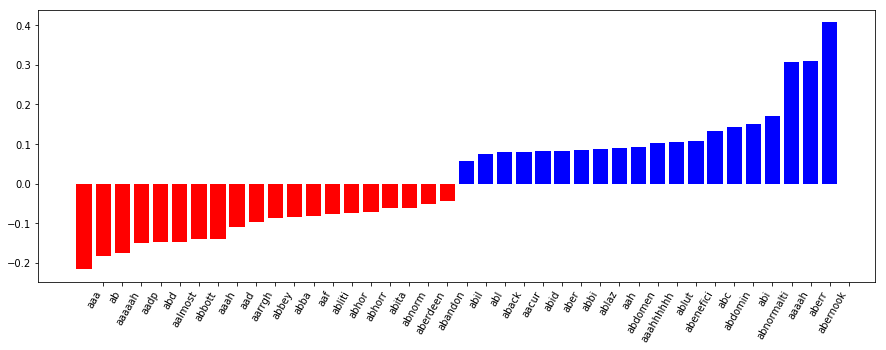

In [73]:
plot_coefficients(clf, count_vect.get_feature_names())

# TFIDF

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))#Vectorizering the data
X_train_tfidf = tf_idf_vect.fit_transform(x_train)
X_test_tfidf = tf_idf_vect.transform(x_test)
print("the type of count vectorizer ",type(X_train_tfidf))
print("Train Data Size: ",X_train_tfidf.shape)
print("Test Data Size: ",X_test_tfidf.shape)


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Train Data Size:  (70000, 931334)
Test Data Size:  (30000, 931334)


In [42]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=False, with_std=True)# Standardizing the data
X2_train = scaler.fit_transform(X_train_tfidf)
X2_test = scaler.fit_transform(X_test_tfidf)


In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=10)

tuned_parameters = {'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]}
                    
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)#Applying SGD on range of Tuned Parameters
model = GridSearchCV(clf, tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)# Applying gridsearch on SGD
model.fit(X2_train, y_train)# fitting the model



Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   22.6s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf2 = SVC(C=0.0001, kernel='linear')#Applying Linear SVC with Values implemented on C from Alpha
clf2.fit(X2_train, y_train)
y_pred_tfidf = clf2.predict(X2_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_tfidf)*100))# accuracy of model on Unseen/Test dataset


Accuracy	on test set: 89.273%


In [46]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_tfidf, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8984800930887373, 0.8927333333333334, 0.8539377810392228, None)

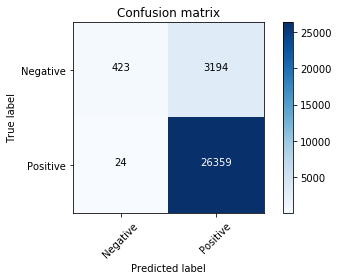

In [47]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_tfidf), classes=["Negative","Positive"])#Passing Parameters in fn to predict values.

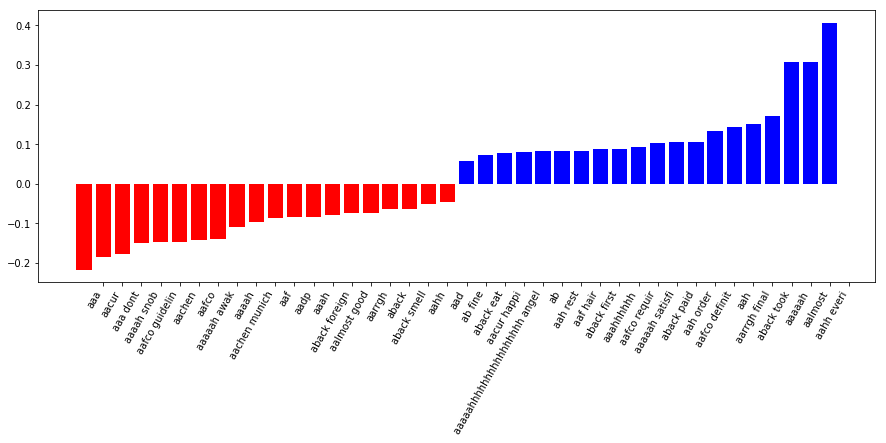

In [74]:
plot_coefficients(clf, tf_idf_vect.get_feature_names())

# AVGW2V

In [35]:
#Word 2 Vector for train corpus
list_of_sent_train=[]#Stored in a list
for sent in x_train:
    list_of_sent_train.append(sent.split())
    
w2v_model_train=Word2Vec(list_of_sent_train,min_count=5,size=50, workers=4)
print(w2v_model_train)

w2v_words_train = list(w2v_model_train.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_train))
print("sample words ", w2v_words_train[0:50])

Word2Vec(vocab=10698, size=50, alpha=0.025)
number of words that occured minimum 5 times  10698
sample words  ['decid', 'roll', 'dice', 'bought', 'spring', 'onion', 'split', 'pea', 'soup', 'sinc', 'like', 'drink', 'wasnt', 'disappoint', 'littl', 'scare', 'first', 'time', 'order', 'food', 'type', 'item', 'amazon', 'sister', 'thought', 'crazi', 'someth', 'normal', 'dont', 'far', 'favorit', 'tri', 'bland', 'tast', 'compar', 'ambrosia', 'tomorrow', 'season', 'perfect', 'light', 'good', 'expect', 'come', 'cup', 'noodl', 'best', 'microwav', 'ever', 'know', 'might']


In [36]:
#Word 2 Vector for test corpus
list_of_sent_test=[]
for sent in x_test:
    list_of_sent_test.append(sent.split())
    
w2v_model_test=Word2Vec(list_of_sent_test,min_count=5,size=50, workers=4)
print(w2v_model_test)

w2v_words_test = list(w2v_model_test.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_test))
print("sample words ", w2v_words_test[0:50])

Word2Vec(vocab=7458, size=50, alpha=0.025)
number of words that occured minimum 5 times  7458
sample words  ['like', 'organ', 'whole', 'grain', 'brown', 'rice', 'take', 'look', 'label', 'milk', 'product', 'two', 'thing', 'dont', 'often', 'see', 'find', 'togeth', 'one', 'made', 'favorit', 'far', 'three', 'boy', 'love', 'even', 'mix', 'unsweeten', 'soy', 'cut', 'sugar', 'high', 'recommend', 'anyon', 'want', 'need', 'avoid', 'dairi', 'that', 'posit', 'say', 'arent', 'lot', 'choic', 'decaf', 'tassimo', 'moment', 'make', 'brew', 'cup']


In [37]:
#train corpus
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            #print(word)
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

70000
50


In [38]:
#test Corpus
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_test:
    
            vec = w2v_model_test.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

30000
50


In [39]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)# Standardizing the dataset
X_train_avgw2v = scaler.fit_transform(sent_vectors_train)
X_test_avgw2v = scaler.fit_transform(sent_vectors_test)


In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=10)

tuned_parameters = {'alpha': [0.00001,0.0001,0.001,0.1,1,10,100,100]}

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, class_weight = 'balanced')
model = GridSearchCV(clf, tuned_parameters, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train_avgw2v, y_train)



Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf = SVC(C=0.0001, kernel='linear', class_weight='balanced')
clf.fit(X_train_avgw2v, y_train)
y_pred_avgw2v = clf.predict(X_test_avgw2v)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_avgw2v)*100))


Accuracy on test set: 77.070%


In [55]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_avgw2v, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8793069353219424, 0.7707, 0.805696291658824, None)

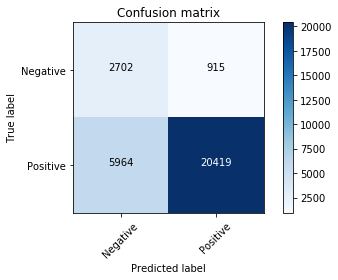

In [56]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_avgw2v), classes=["Negative","Positive"])#Passing Parameters in fn to predict values.

# TFIDF AVGW2V

In [43]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(x_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [44]:
tfidf_feat = tf_idf_vect.get_feature_names()#getting feature list

In [45]:
from tqdm import tqdm
tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))#taking the dictionary to train words to plt vector. 
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

print(len(tfidf_sent_vectors_train))
print(len(tfidf_sent_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:33<00:00, 454.81it/s]


70000
50


In [46]:
model = TfidfVectorizer(ngram_range=(1,2))
tf_idf_matrix = model.fit_transform(x_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_test = dict(zip(model.get_feature_names(), list(model.idf_)))

In [47]:
#test corpus
tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_test:
            vec = w2v_model_test.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary_test[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

print(len(tfidf_sent_vectors_test))
print(len(tfidf_sent_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:56<00:00, 533.57it/s]


30000
50


In [48]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=False, with_std=True)
X_train_avgw2v_tfidf = scaler.fit_transform(tfidf_sent_vectors_train)
X_test_avgw2v_tfidf = scaler.fit_transform(tfidf_sent_vectors_test)

In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=10)

tuned_parameters = {'alpha': [1e-1, 1e0, 1e1, 1e2, 1e3]}

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, class_weight = 'balanced' )
model = GridSearchCV(clf, tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)
model.fit(X_train_avgw2v_tfidf, y_train)



Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf = SVC(C=0.0001, kernel='linear', class_weight='balanced')
clf.fit(X_train_avgw2v_tfidf, y_train)
y_pred_avgw2v_tfidf = clf.predict(X_test_avgw2v_tfidf)
print("Accuracy	on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_avgw2v_tfidf)*100))


Accuracy	on test set: 70.087%


In [58]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_avgw2v_tfidf, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8709935845152833, 0.7008666666666666, 0.7519436888056169, None)

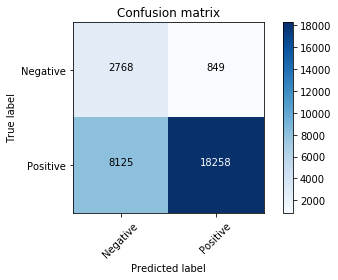

In [59]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_avgw2v_tfidf), classes=["Negative","Positive"])#Passing Parameters in fn to predict values.

| Classifier | Feature Name |  Value of C   | Accuracy 
|------------|--------|
|  Linear SVM     |  BOW  | 0.0001 | 90.97
|  Linear SVM    |  TFIDF | 0.0001 | 89.27 
|  Linear SVM     |  AVGW2VEC  | 0.0001 | 77.07 
|  Linear SVM    |  TFIDF AVGW2VEC | 0.0001 | 70.08 

## Observation : 1. The Best Model is Bag of Words with High accuracy.Though the Value of C which is the hyperparameter is same for all.

Conclusion : As the value of n is very large, we would not use SVM for Internet applications as the latency is very high.